### Machine Learning Models

In [34]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score, precision_recall_curve, precision_recall_fscore_support
from tensorflow.keras import models, layers
import warnings

warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("/CSEngg/SQLinjection/models/sqli.csv", encoding="utf-16")
df

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
...,...,...
4195,"org/?option = com_k2 <a href = ""http://corfopym",0
4196,com/?option = com_k2 <act> <![CDATA[procMemb...,0
4197,picsearch,0
4198,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0


In [19]:
X = df['Sentence']
y = df['Label']

In [20]:
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3360, 4717)
(840, 4717)
(3360,)
(840,)


In [21]:
f1s_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

#### Supervised - 

Random Forest

In [22]:
# RF code
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

f1s_dict["RandomForest"] = f1_score(y_pred, y_test)
precision_dict["RandomForest"] = precision_score(y_pred, y_test)
recall_dict["RandomForest"] = recall_score(y_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(y_pred, y_test)

Accuracy of Random Forest on test set : 0.9238095238095239
F1 Score of Random Forest on test set : 0.8764478764478765


Decision Tree Classifier

In [23]:
# DTC code
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

f1s_dict["DecisionTree"] = f1_score(y_pred, y_test)
precision_dict["DecisionTree"] = precision_score(y_pred, y_test)
recall_dict["DecisionTree"] = recall_score(y_pred, y_test)
accuracy_dict['DecisionTree'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.8857142857142857
F1 Score of Naive Bayes on test set : 0.8254545454545454


Support Vector Machines

In [24]:
# SVM code
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y_test)}")

f1s_dict["SVM"] = f1_score(y_pred, y_test)
precision_dict["SVM"] = precision_score(y_pred, y_test)
recall_dict["SVM"] = recall_score(y_pred, y_test)
accuracy_dict['SVM'] = accuracy_score(y_pred, y_test)

Accuracy of SVM on test set : 0.7869047619047619
F1 Score of SVM on test set : 0.34909090909090906


Convolutional Neural Network

In [25]:
# CNN code
model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,4717)))
model.add(layers.Conv1D(32, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

X_train1 = X_train.reshape(-1, 1, 4717)
X_test1 = X_test.reshape(-1, 1, 4717)

history = model.fit(X_train1, y_train, epochs = 10, validation_data = (X_test1, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             150976    
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             1056      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 152,065
Trainable params: 152,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
105/105 [==============================] - 3s 9ms/step - loss: 0.4212 - accuracy: 0.8161 - val_loss: 0.2239 - val_accuracy: 0.8786
Epoch 2/10
105/105 [====================

In [26]:
y_pred = model.predict(X_test1).flatten()
y_pred = np.round(y_pred)
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of CNN on test set : {f1_score(y_pred, y_test)}")

f1s_dict["CNN"] = f1_score(y_pred, y_test)
precision_dict["CNN"] = precision_score(y_pred, y_test)
recall_dict["CNN"] = recall_score(y_pred, y_test)
accuracy_dict['CNN'] = accuracy_score(y_pred, y_test)

27/27 [==============================] - 0s 3ms/step
Accuracy of CNN on test set : 0.9845238095238096
F1 Score of CNN on test set : 0.9721627408993576


#### Unsupervised - 

K-means Clustering

In [36]:
# K-Means code

Hierarchical Clustering

In [37]:
# Hierarchical code

Principal Component Analysis

In [33]:
# PCA code


[0.06573887 0.04918013]


#### Reinforcement Learning - 

Q-Learning

In [13]:
# Q-learning code

Deep Reinforcement Learning

In [14]:
# Deep reinforcement learning code

### Charts and Graphs

In [27]:
keys = f1s_dict, precision_dict, recall_dict, accuracy_dict
metrics = ['F1_Score', 'Precision', 'Recall', 'Accuracy']
data = pd.DataFrame(keys)
data.index = metrics
data

,RandomForest,DecisionTree,SVM,CNN
F1_Score,0.876448,0.825455,0.349091,0.972163
Precision,1.000000,1.000000,0.211454,1.000000
Recall,0.780069,0.702786,1.000000,0.945833
Accuracy,0.923810,0.885714,0.786905,0.984524


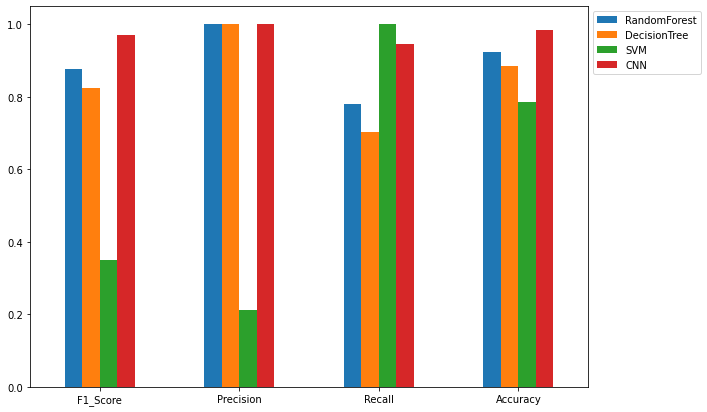

In [30]:
result = data.plot(kind='bar', rot=0, figsize=(10,7))
result.legend(bbox_to_anchor=(1, 1), loc='upper left')